<a href="https://colab.research.google.com/github/m1key/raspberry-pi/blob/master/Humidity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import pandas as pd
from io import StringIO

TESTDATA = StringIO("""
    2020-03-27 18:00:11,32.00,22.00
    2020-03-28 18:00:11,40.00,22.00
    2020-03-29 18:00:11,39.00,22.00
    2020-03-29 19:20:10,140.00,21.00
    2020-03-29 20:00:11,41.00,22.00
    2020-03-30 01:20:15,20.00,29.00
    2020-04-01 14:10:19,31.00,23.00
    2020-04-02 13:10:19,11.00,23.00
    2020-04-03 13:10:19,55.00,23.00
    """)

#df = pd.read_csv(TESTDATA, sep=",", names=['datetime', 'humidity', 'temperature'])
url = 'https://raw.githubusercontent.com/m1key/raspberry-pi/master/humidity/humidity.csv'
df = pd.read_csv(url, sep=",", names=['datetime', 'humidity', 'temperature'])
df = df[df.humidity < 100]
df = df[df.humidity > 0]

df['datetime'] = pd.to_datetime(df['datetime'])
df = df.set_index('datetime')
df = df.groupby(pd.Grouper(freq="5min")).mean()
df = df.reset_index()
df['healthy_min'] = 30
df['healthy_max'] = 50
df.shape

(190, 5)

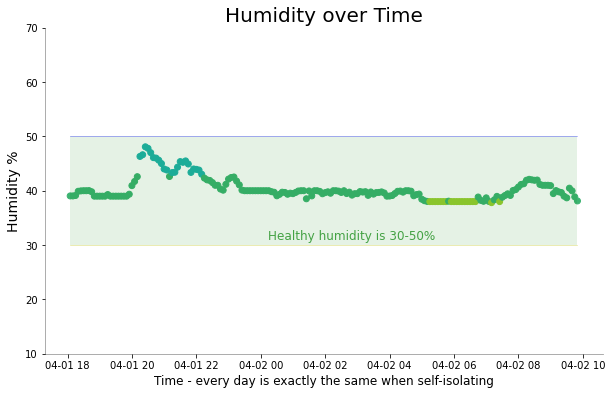

In [65]:
import matplotlib.pyplot as plt

from matplotlib import cm
cmap = cm.get_cmap('Accent').reversed()

import numpy as np
colors = np.where(df["humidity"] > 50, 'dodgerblue', 
         (np.where(df["humidity"] > 43, 'lightseagreen',
                   (np.where(df["humidity"] > 38, 'mediumseagreen', 'yellowgreen')))))

fig, ax = plt.subplots(1, figsize=(10,6))
ax.scatter(df['datetime'], df['humidity'], c=colors)
ax.plot(df['datetime'], df['healthy_min'], linestyle='solid', color="y", linewidth=0.6, label="min healthy humidity", alpha=0.5)
ax.plot(df['datetime'], df['healthy_max'], linestyle='solid', color="b", linewidth=0.6, label="max healthy humidity", alpha=0.5)

plt.title('Humidity over Time', fontsize=20)
plt.xlabel('Time - every day is exactly the same when self-isolating', fontsize=12)
plt.ylabel('Humidity %', fontsize=14)
plt.ylim(10, 70)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_alpha(0.4)
ax.spines['bottom'].set_alpha(0.4)

plt.fill_between(df['datetime'].values, df['healthy_min'], df['healthy_max'],
                where=df['healthy_max'] >= df['healthy_min'],
                facecolor='green', alpha=0.1)

ax.text(0.7, 0.34, 'Healthy humidity is 30-50%',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='green', fontsize=12, alpha=0.7)

plt.show()